In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import warnings
warnings.filterwarnings('ignore')

# Data collection and Analysis

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Divided into categorical or numerical data

In [11]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]== "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")

numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
        
print("Numerical columns: ", numerical_col)

categorical columns:  ['sex', 'smoker', 'region']


Numerical columns:  ['age', 'bmi', 'children', 'charges']


# Data Analysis

In [12]:
data['sex'].count()

1338

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

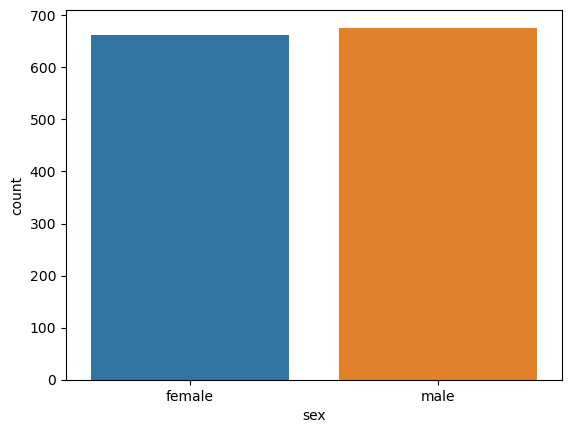

In [14]:
ax = sns.countplot(x='sex',data=data)
plt.show()

In [15]:
data['smoker'].count()

1338

In [16]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

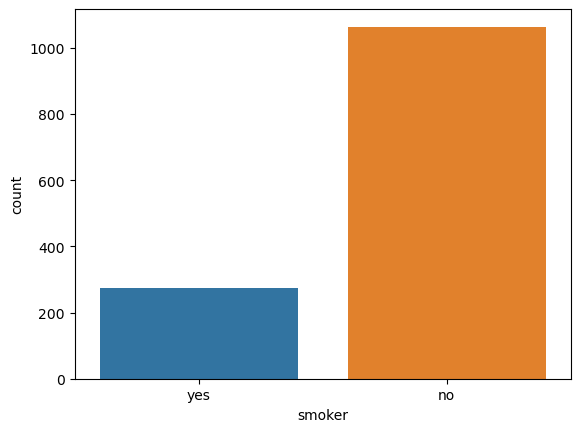

In [17]:
ax = sns.countplot(x='smoker',data=data)
plt.show()

In [18]:
data['region'].count()

1338

In [19]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

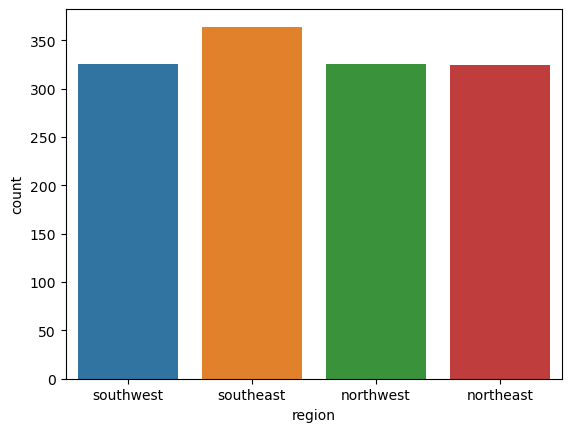

In [20]:
ax=sns.countplot(x='region',data=data)
plt.show()

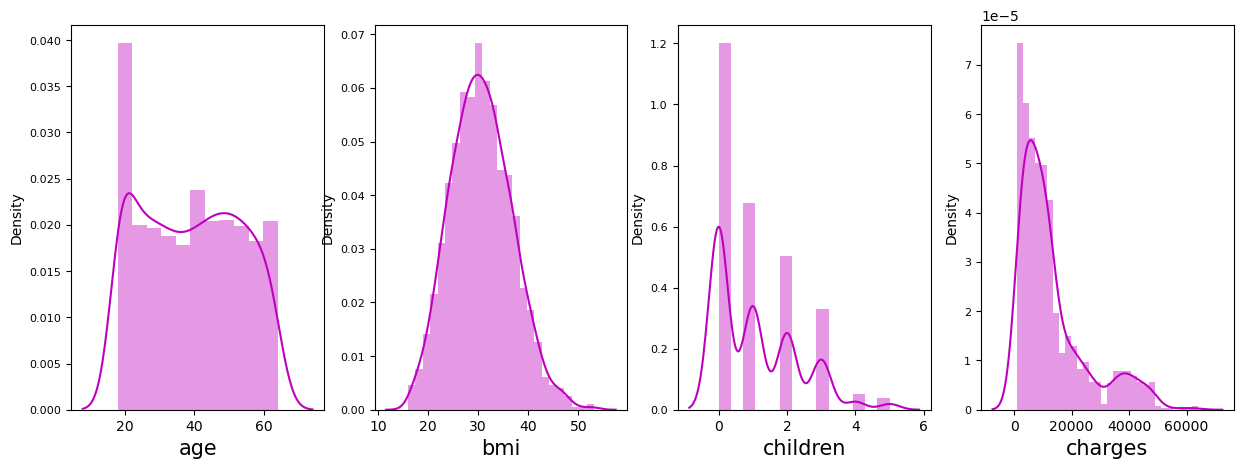

In [21]:
plt.figure(figsize = (15, 5), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(1,4, plotnumber)
        sns.distplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 8)
    plotnumber+=1
plt.show()

In [22]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoded the categorical features

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data [i].dtypes=='object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


# check the skewness

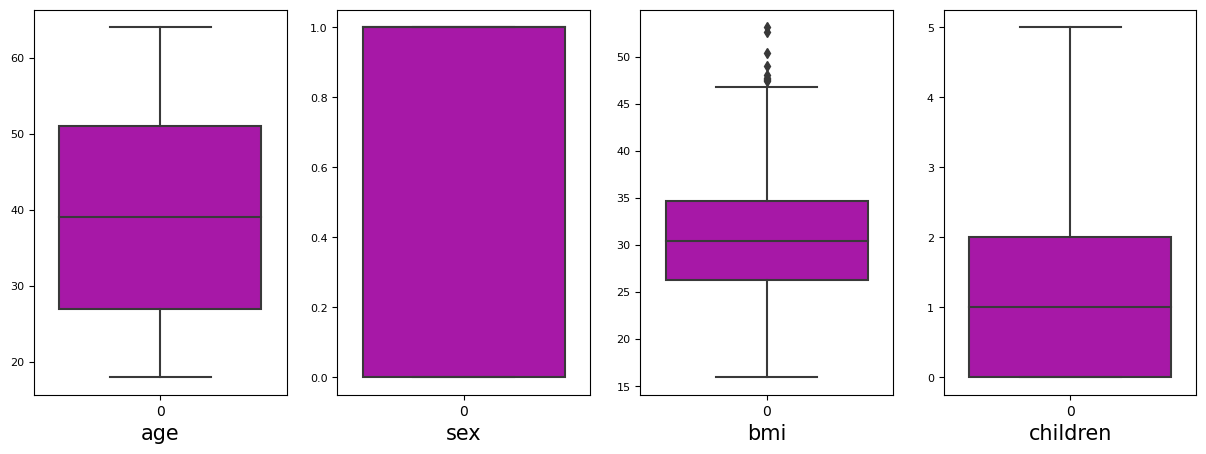

In [26]:
plt.figure(figsize = (15, 5), facecolor = 'white')
plotnumber = 1
for col in data:
    if plotnumber<=4:
        ax=plt.subplot(1,4, plotnumber)
        sns.boxplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 8)
    plotnumber+=1
plt.show()

In [27]:
data.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

# Remove the skewness

In [28]:
data['bmi']= np.cbrt(data['bmi'])

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,3.032970,0,1.0,3.0,16884.92400
1,18,1.0,3.232290,1,0.0,2.0,1725.55230
2,28,1.0,3.207534,3,0.0,2.0,4449.46200
3,33,1.0,2.831656,0,0.0,1.0,21984.47061
4,32,1.0,3.068073,0,0.0,1.0,3866.85520


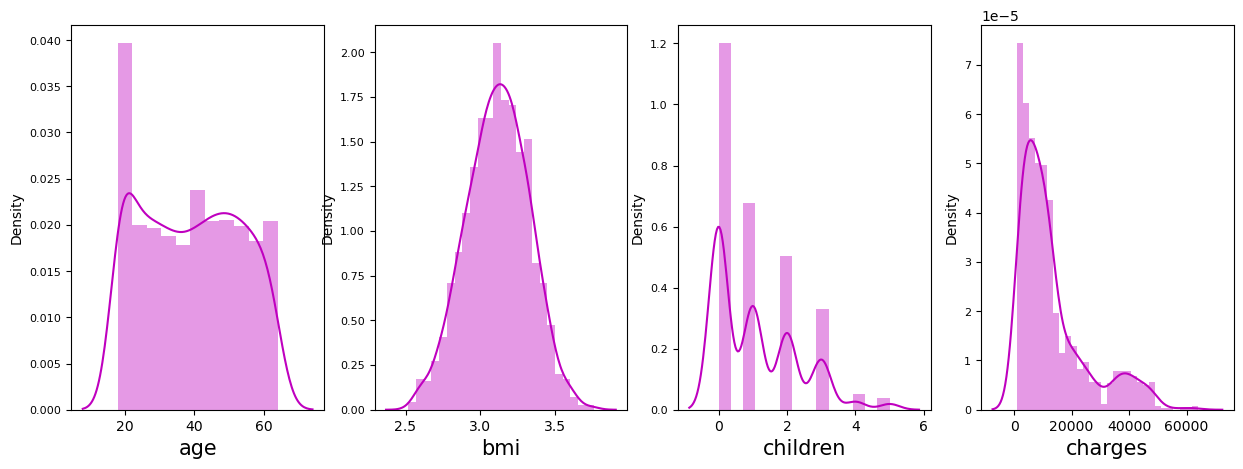

In [30]:
plt.figure(figsize = (15, 5), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(1,4, plotnumber)
        sns.distplot(data[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 8)
    plotnumber+=1
plt.show()

# Split the data features and target value

In [31]:
X = data.drop(columns=['charges'])
Y = data['charges']

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,0.0,3.032970,0,1.0,3.0
1,18,1.0,3.232290,1,0.0,2.0
2,28,1.0,3.207534,3,0.0,2.0
3,33,1.0,2.831656,0,0.0,1.0
4,32,1.0,3.068073,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,3.140367,3,0.0,1.0
1334,18,0.0,3.172154,0,0.0,0.0
1335,18,0.0,3.327713,0,0.0,2.0
1336,21,0.0,2.954880,0,0.0,3.0


In [33]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Spliting the training and testing data

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.27, random_state=245)

In [35]:
print(X.shape, x_train.shape, x_test.shape)

(1338, 6) (976, 6) (362, 6)


# Model training

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Model evaluation

In [37]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled

array([[-1.43876426, -1.0105187 , -0.39841455, -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.55700092, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.43833682,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.01439534, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.77272477, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.19796988, -0.90861367,  1.97058663,
        -0.46691549]])

In [40]:
training_data_prediction = regressor.predict(x_train)

In [41]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  0.7413010041388829


In [42]:
test_data_prediction = regressor.predict(x_test)

In [43]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.7746374396372557


# Predict the model

In [44]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1.0,3.140367,3,0.0,1.0,10600.5483
1334,18,0.0,3.172154,0,0.0,0.0,2205.9808
1335,18,0.0,3.327713,0,0.0,2.0,1629.8335
1336,21,0.0,2.954880,0,0.0,3.0,2007.9450
1337,61,0.0,3.074787,0,1.0,1.0,29141.3603


In [45]:
print(' Insurance charges : ',regressor.predict(scaler.transform([[61,0.0,3.07,0,1.0,1.0]])))

 Insurance charges :  [14336.54901903]


# Use ridge lasso cv

In [46]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# Model trianing

In [47]:
lassocv = LassoCV(alphas = None, max_iter = 15)
lassocv.fit(x_train, y_train)

LassoCV(max_iter=15)

In [48]:
alpha = lassocv.alpha_
alpha

50.04542641245832

In [49]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50.04542641245832)

In [50]:
lasso_reg.score(x_test, y_test)

0.7732841602599816

In [51]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [52]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [53]:
ridgecv.alpha_

0.09099999999999998

In [54]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

# Predict the model

In [55]:
ridge_model.score(x_test,y_test)

0.7746099728891738